# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

Things I should have learnt by this day's exercises:
1. Create a Chloropleth to display data on map
2. Create bar charts to show different segments of data, Sunburst charts with plotly
3. Seaborn's lmplot with row, hue and lowess parameters for best fit line
4. Analyze same data with different methods, use histogram to see distribution and descriptive analysis

Given: imports, challenge setups

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
print(df_data.shape)
print(df_data.columns)
print(df_data.head())
df_data.describe()

(962, 16)
Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3 

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


Wow! lots of columns with this one. We will need to work with caution. This time I didn't forget to do describe, though it does nothing because only year is in numeric format, not very insightful, but at least we know the min is 1901 so first one was in 1901

In [5]:
print('First Nobel Prize awarded in: ', df_data.year.min())
print('Latest year in the dataset: ', df_data.year.max())

First Nobel Prize awarded in:  1901
Latest year in the dataset:  2020


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [6]:
print(df_data.duplicated().value_counts())
# There must have been another way to count, let me see
print(df_data.duplicated().any())
df_data[df_data.duplicated()]

False    962
Name: count, dtype: int64
False


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO


No row duplicates detected, nice

In [ ]:
# In the course, the duplicates and NaN values are first checked using any, similar to my approach, with some difference
df_data.duplicated().values.any()
df_data.isna().values.any()

### Check for NaN Values

In [7]:
print(df_data.isna().value_counts())

year   category  prize  motivation  prize_share  laureate_type  full_name  birth_date  birth_city  birth_country  birth_country_current  sex    organization_name  organization_city  organization_country  ISO  
False  False     False  False       False        False          False      False       False       False          False                  False  False              False              False                 False    698
                                                                                                                                                True               True               True                  False    153
                        True        False        False          False      False       False       False          False                  False  True               True               True                  False     68
                                                                           True        True        True           True                   Tr

So there's NaN values in motivation, birth_date, birth_city, birth_country, birth_country_current, sex, organization_name, organization_country and ISO

In [8]:
for column in df_data.columns:
  print(f'NaN values in {column}: {df_data[column].isna().sum()}')

NaN values in year: 0
NaN values in category: 0
NaN values in prize: 0
NaN values in motivation: 88
NaN values in prize_share: 0
NaN values in laureate_type: 0
NaN values in full_name: 0
NaN values in birth_date: 28
NaN values in birth_city: 31
NaN values in birth_country: 28
NaN values in birth_country_current: 28
NaN values in sex: 28
NaN values in organization_name: 255
NaN values in organization_city: 255
NaN values in organization_country: 254
NaN values in ISO: 28


In the course, df_data.isna().sum() is used, which can apparently give a sum for each column itself. But I had to use my brain muscles for another approach as well.

To see why these columns have NaN values, let's create a dataframe of only rows with NaN values

In [9]:
nan_df = df_data.loc[np.nonzero(df_data.isna().sum(axis=1))]
print(nan_df.shape)
nan_df

(264, 16)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2019,Literature,The Nobel Prize in Literature 2019,“for an influential work that with linguistic ...,1/1,Individual,Peter Handke,1942-12-06,Griffen,Austria,Austria,Male,NaN,NaN,NaN,AUT
946,2019,Peace,The Nobel Peace Prize 2019,“for his efforts to achieve peace and internat...,1/1,Individual,Abiy Ahmed Ali,1976-08-15,Beshasha,Ethiopia,Ethiopia,Male,NaN,NaN,NaN,ETH
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR


Took some thinking to figure this out. At least I can be relieved I did it.

From this we can see that 255 out of the 264 NaNs were due to organization name/address so maybe we can just nuke all columns related to organization so that we have a clean one? Let's look at the course solution

So after looking at the course solution, it has a filter for looking at columns with no birth dates, and we can do it ourselves as well:

In [10]:
columns_of_interest = ['year', 'category', 'laureate_type', 'full_name', 'birth_date', 'organization_name']
df_data.loc[df_data.birth_date.isna()][columns_of_interest]

,year,category,laureate_type,full_name,birth_date,organization_name
24,1904,Peace,Organization,Institut de droit international (Institute of ...,NaN,NaN
60,1910,Peace,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
200,1938,Peace,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
237,1947,Peace,Organization,American Friends Service Committee (The Quakers),NaN,NaN
238,1947,Peace,Organization,Friends Service Council (The Quakers),NaN,NaN
283,1954,Peace,Organization,Office of the United Nations High Commissioner...,NaN,NaN
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
349,1963,Peace,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN


Since we've already transformed birth date to time, we see NaT instead of NaN but it's still a NA value. We can also see that all the entries with no birth date are organizations. These also don't have an organization name, understandable.

But what if we want to see the entries that have NaN organizations, it has a lot more content.

In [11]:
df_data.loc[df_data.organization_name.isna()][columns_of_interest].head()

,year,category,laureate_type,full_name,birth_date,organization_name
1,1901,Literature,Individual,Sully Prudhomme,1839-03-16,NaN
3,1901,Peace,Individual,Frédéric Passy,1822-05-20,NaN
4,1901,Peace,Individual,Jean Henry Dunant,1828-05-08,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,1817-11-30,NaN
9,1902,Peace,Individual,Charles Albert Gobat,1843-05-21,NaN


Nope, these are mostly individuals who were not affiliated to certain organizations.But from the category we can see that these laureates are mostly in the humanites field and not the sciences.

### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [12]:
# df_data.year = pd.to_datetime(df_data.year)
# Since the course instead has this as an int64, I'll do it too, the datetime format it converts this to is too descriptive
df_data.year = pd.to_numeric(df_data.year)
df_data.birth_date = pd.to_datetime(df_data.birth_date)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

Okay confirmed that the columns are now of type datetime

#### Add a Column with the Prize Share as a Percentage

In [13]:
pct_share = df_data.prize_share.str.split('/')
# pct_share['perc'] = pct_share.values[0]/pct_share.values[1]
pct_ = [str(int(val[0])/int(val[1])*100)+'%' for val in pct_share]
df_data.insert(loc= 5, column='Prize_Share_Perc', value= pct_)

The course solution was similar, but while I meticulously placed the column at one location and gave it a name different than the original scalar, it was done implicitly in the course solution



In [14]:
separated_values = df_data.prize_share.str.split('/', expand=True)
# using expand attribute, the newly formed columns are conveniently named 0 and 1 for easy extraction
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])
df_data['pct_share'] = numerator / denominator

A challenge here was to ask 3 questions about the data, and answer it later if no answer was given. We can look at the data and prepare our own questions

1. What is the relative number of men and women winning Nobel prize since the beginning? Is the trend stable or turning some way?
2. Average age at the time of being awarded the Nobel prize?
3. Individual vs Organization nobel prizes across different categories?

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [15]:
prizes_by_sex = df_data.sex.value_counts()
total = prizes_by_sex.sum()
prizes_by_sex = (prizes_by_sex / total) * 100

This prizes_by_sex did not have to be converted into percentage as that job would already be done by plotly before plotting

In [16]:
prizes_by_sex_donut = px.pie(prizes_by_sex, names=prizes_by_sex.index,
                             values=prizes_by_sex.values,
                             hole = 0.6)
prizes_by_sex_donut.update_traces(textposition='inside', textinfo='percent+label')
prizes_by_sex_donut.show()

Differences in solution code: attribute textfont_size = 15 in the update_traces method

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [17]:
columns_of_interest = ['year', 'category', 'motivation', 'full_name', 'birth_country', 'organization_name']

female_laureates = df_data.loc[df_data.sex == 'Female'].sort_values(by='year')
female_laureates[columns_of_interest].head() # Shows first 5

,year,category,motivation,full_name,birth_country,organization_name
18,1903,Physics,"""in recognition of the extraordinary services ...","Marie Curie, née Sklodowska",Russian Empire (Poland),NaN
29,1905,Peace,NaN,"Baroness Bertha Sophie Felicita von Suttner, n...",Austrian Empire (Czech Republic),NaN
51,1909,Literature,"""in appreciation of the lofty idealism, vivid ...",Selma Ottilia Lovisa Lagerlöf,Sweden,NaN
62,1911,Chemistry,"""in recognition of her services to the advance...","Marie Curie, née Sklodowska",Russian Empire (Poland),Sorbonne University
128,1926,Literature,"""for her idealistically inspired writings whic...",Grazia Deledda,Italy,NaN


Physics, Peace, Literature, Chemistry. Wide band, but it took 70 years for a woman to get her first Nobel prize. Madam Marie Curie appears twice, being the first as well as the fourth woman to get the Nobel prize. She received one in Physics and one in Chemistry.

Baroness Bertha Sophie ... received one for Peace, but the motivation is not given, perhaps because the country as a whole was responsible.

Only Marie Curie was affiliated to an organization i..e Sorbonne University, when she received her second Nobel Prize, among the three.

Looking at the birth conutries, we can see that only Sweden and Italy stand today, the others have since been disbanded and rebranded into their modern forms: Russia and Czech Republic

In [18]:
i = 0
for motive in female_laureates.motivation:
  print(motive)
  if i<5:
    i += 1
  else:
    break

"in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"
nan
"in appreciation of the lofty idealism, vivid imagination and spiritual perception that characterize her writings"
"in recognition of her services to the advancement of chemistry by the discovery of the elements radium and polonium, by the isolation of radium and the study of the nature and compounds of this remarkable element"
"for her idealistically inspired writings which with plastic clarity picture the life on her native island and with depth and sympathy deal with human problems in general"
"principally for her powerful descriptions of Northern life during the Middle Ages"


Course solution:

df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3]

Difference with mine: I only show some columns, and I forgot how to slice, honestly, I mean I would've used head(3) if I wanted only 3 but anyway..

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

I will disregard the fact that the same person might have won the Nobel Prize twice in a different team, since I don't know how to separate two authors while retaining all info about the nobel prize to their individual name.

I'll incorporate that if the course asks for it, or shows me how.

In [19]:
multiple_winners = df_data.loc[df_data.full_name.duplicated()].full_name
print(multiple_winners)

# or maybe if I'm feeling brave
multiple_winners = df_data.full_name.value_counts().sort_values(ascending=False)
print(multiple_winners[multiple_winners.values>1])

62                           Marie Curie, née Sklodowska
215    Comité international de la Croix Rouge (Intern...
340                                   Linus Carl Pauling
348    Comité international de la Croix Rouge (Intern...
424                                         John Bardeen
505                                     Frederick Sanger
523    Office of the United Nations High Commissioner...
Name: full_name, dtype: object
full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
John Bardeen                                                                         2
Linus Carl Pauling                                                                   2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Marie Curie, née Sklodowska                                                          2
Name: count, dtype: int64


It worked!

In [95]:
# Course solution

is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

The difference with my code is that I didn't use the subset attribute and instead only looked for duplicated values within the full_name column.

I see nunique() was used since keep=False gives out all the occurences as true. Anyway I had done it two ways, and I showed how mnay times the multiple winners actually won as well.

# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [20]:
category_prizes = df_data.category.value_counts()
category_prizes

,count
category,
Medicine,222
Physics,216
Chemistry,186
Peace,135
Literature,117
Economics,86


The course solutionn uses nunique() to find number of categories, then same as mine for the counts for each category.

but since number of categories here is irrelevant, as we're taking them all anyway, my approach is the same as the solution.

Differences in the plotting process below:
I used the dictionary method for title I saw in the docs, but in the solution, there was a way I had forgotten i.e. by using xaxis_title and yaxis_title attributes.

I also seem to always forget to put title to my charts.

In [21]:
category_prizes_bar = px.bar(category_prizes, x= category_prizes.index, y= category_prizes.values,
                            color_continuous_scale='Aggrnyl', color = category_prizes.values
                             )
category_prizes_bar.update_layout(coloraxis_showscale= False,
                                  xaxis={'title': {'text': 'Category'}}, yaxis = {'title': {'text': 'Number of Nobel prizes awarded'}})
category_prizes_bar.show()

Adding label is hard in this library, wow, double dict encapsulation!

Medicine has 222(most) prizes awarded, while Economics has 86(least)

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [22]:
first_one_for_eco = df_data.loc[df_data.category == 'Economics'].year.idxmin()
df_data.loc[first_one_for_eco][columns_of_interest]

,393
year,1969
category,Economics
motivation,"""for having developed and applied dynamic mode..."
full_name,Jan Tinbergen
birth_country,Netherlands
organization_name,The Netherlands School of Economics


In [ ]:
# Course solution:
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

This lists all the initial ones. I didn't want to rely on sort_values so I used idxmin() but both methods are valid by their own right. Mine is faster I'd like to believe.

Until this point, I had converted the year to datetime object and it gave year as 1970, but now that I've matched it with the course by making it int64, it shows 1969, interesting.

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

For this, I had to glance at the first part of the solution as I was confused because of groupby producing a multiindex series, and plotly apparently can't work with multi indices, so I had to stop and look at the solution code.

I then realized there was a parameter called as_index which can be False so that I get a dataframe instead. I had also forgotten about the aggregator function. I need to get my act together.

In [23]:
sex_split = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
sex_split.sort_values(by='prize', ascending=False, inplace=True)
sex_split

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


Yet again I forgot we could sort the values. This way male would appear on top and would be put below. What even is happening to my brain.

In [24]:
# I wanted to use wide data format from docs but couldn't somehow.
sex_split_plot = px.bar(sex_split, x= 'category', y='prize', color='sex',
                        title= 'Male and Female Nobel Prize Winners by Category')
sex_split_plot.update_layout(xaxis_title= 'Category', yaxis_title= 'Number of Nobel Prizes')
sex_split_plot.show()

There's 16 Nobel Prizes for women in Literature, and 4 for Physics, one of which is Madam Curie.

I had to take much reference from the course for this one, wasting a lot of time in the process.

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [25]:
prizes_each_year = df_data.groupby('year').agg({'prize': pd.Series.count})
prizes_each_year

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


Course solution:

prize_per_year = df_data.groupby(by='year').count().prize

Have to admit my aggregation function was a bit of an overkill to get the exact same answer

In [26]:
rolling_5year = prizes_each_year.rolling(window=5, min_periods=1).mean()
rolling_5year

,prize
year,
1901,6.00
1902,6.50
1903,6.67
1904,6.50
1905,6.20
...,...
2016,11.60
2017,12.00
2018,12.00


I was using a step value of 5 but we want a more continuous looking curve, so I removed that value

I was initially confused about using min_periods, but this is how I understood it: it is the number of periods that are needed until the current index in order to calculate the rolling. here we have window of 5 so until we reach 1905, we don't have enough values to calculate rolling, so by setting it to 1, we allow 1901's rolling to be its value alone, 1902's rolling to be average of 1901 and 1902, and so on.

This wasn't used in the course solution below, however:

In [27]:
# Course soln
moving_average = prizes_each_year.rolling(window=5).mean()
moving_average

,prize
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,6.20
...,...
2016,11.60
2017,12.00
2018,12.00


But this one has NaN values, what are we even trying to do here?

The rest of the part for this, I have no idea. I will need to look at the solution, again. Today has been the most demoralizing in terms of my own abiility to solve problems.

After looking at the solution, I found out that we can use both plt.scatter and plt.plot and they will superimpose automatically.

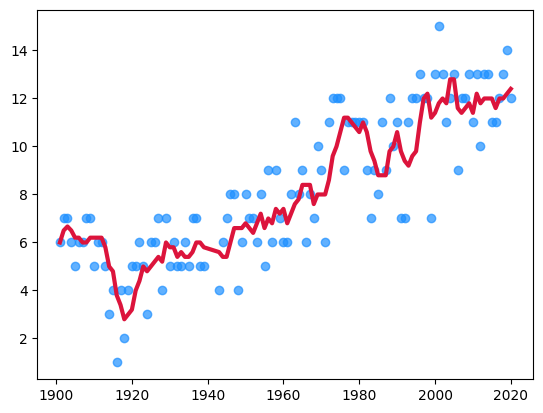

In [28]:
plt.scatter(x= prizes_each_year.index, y= prizes_each_year.values,
            c= 'dodgerblue', alpha=0.7)
plt.plot(rolling_5year.index, rolling_5year.values,
         c= 'crimson', linewidth= 3)
plt.show()

I seem to have forgotten everything, so I'll now try to remember and write it here

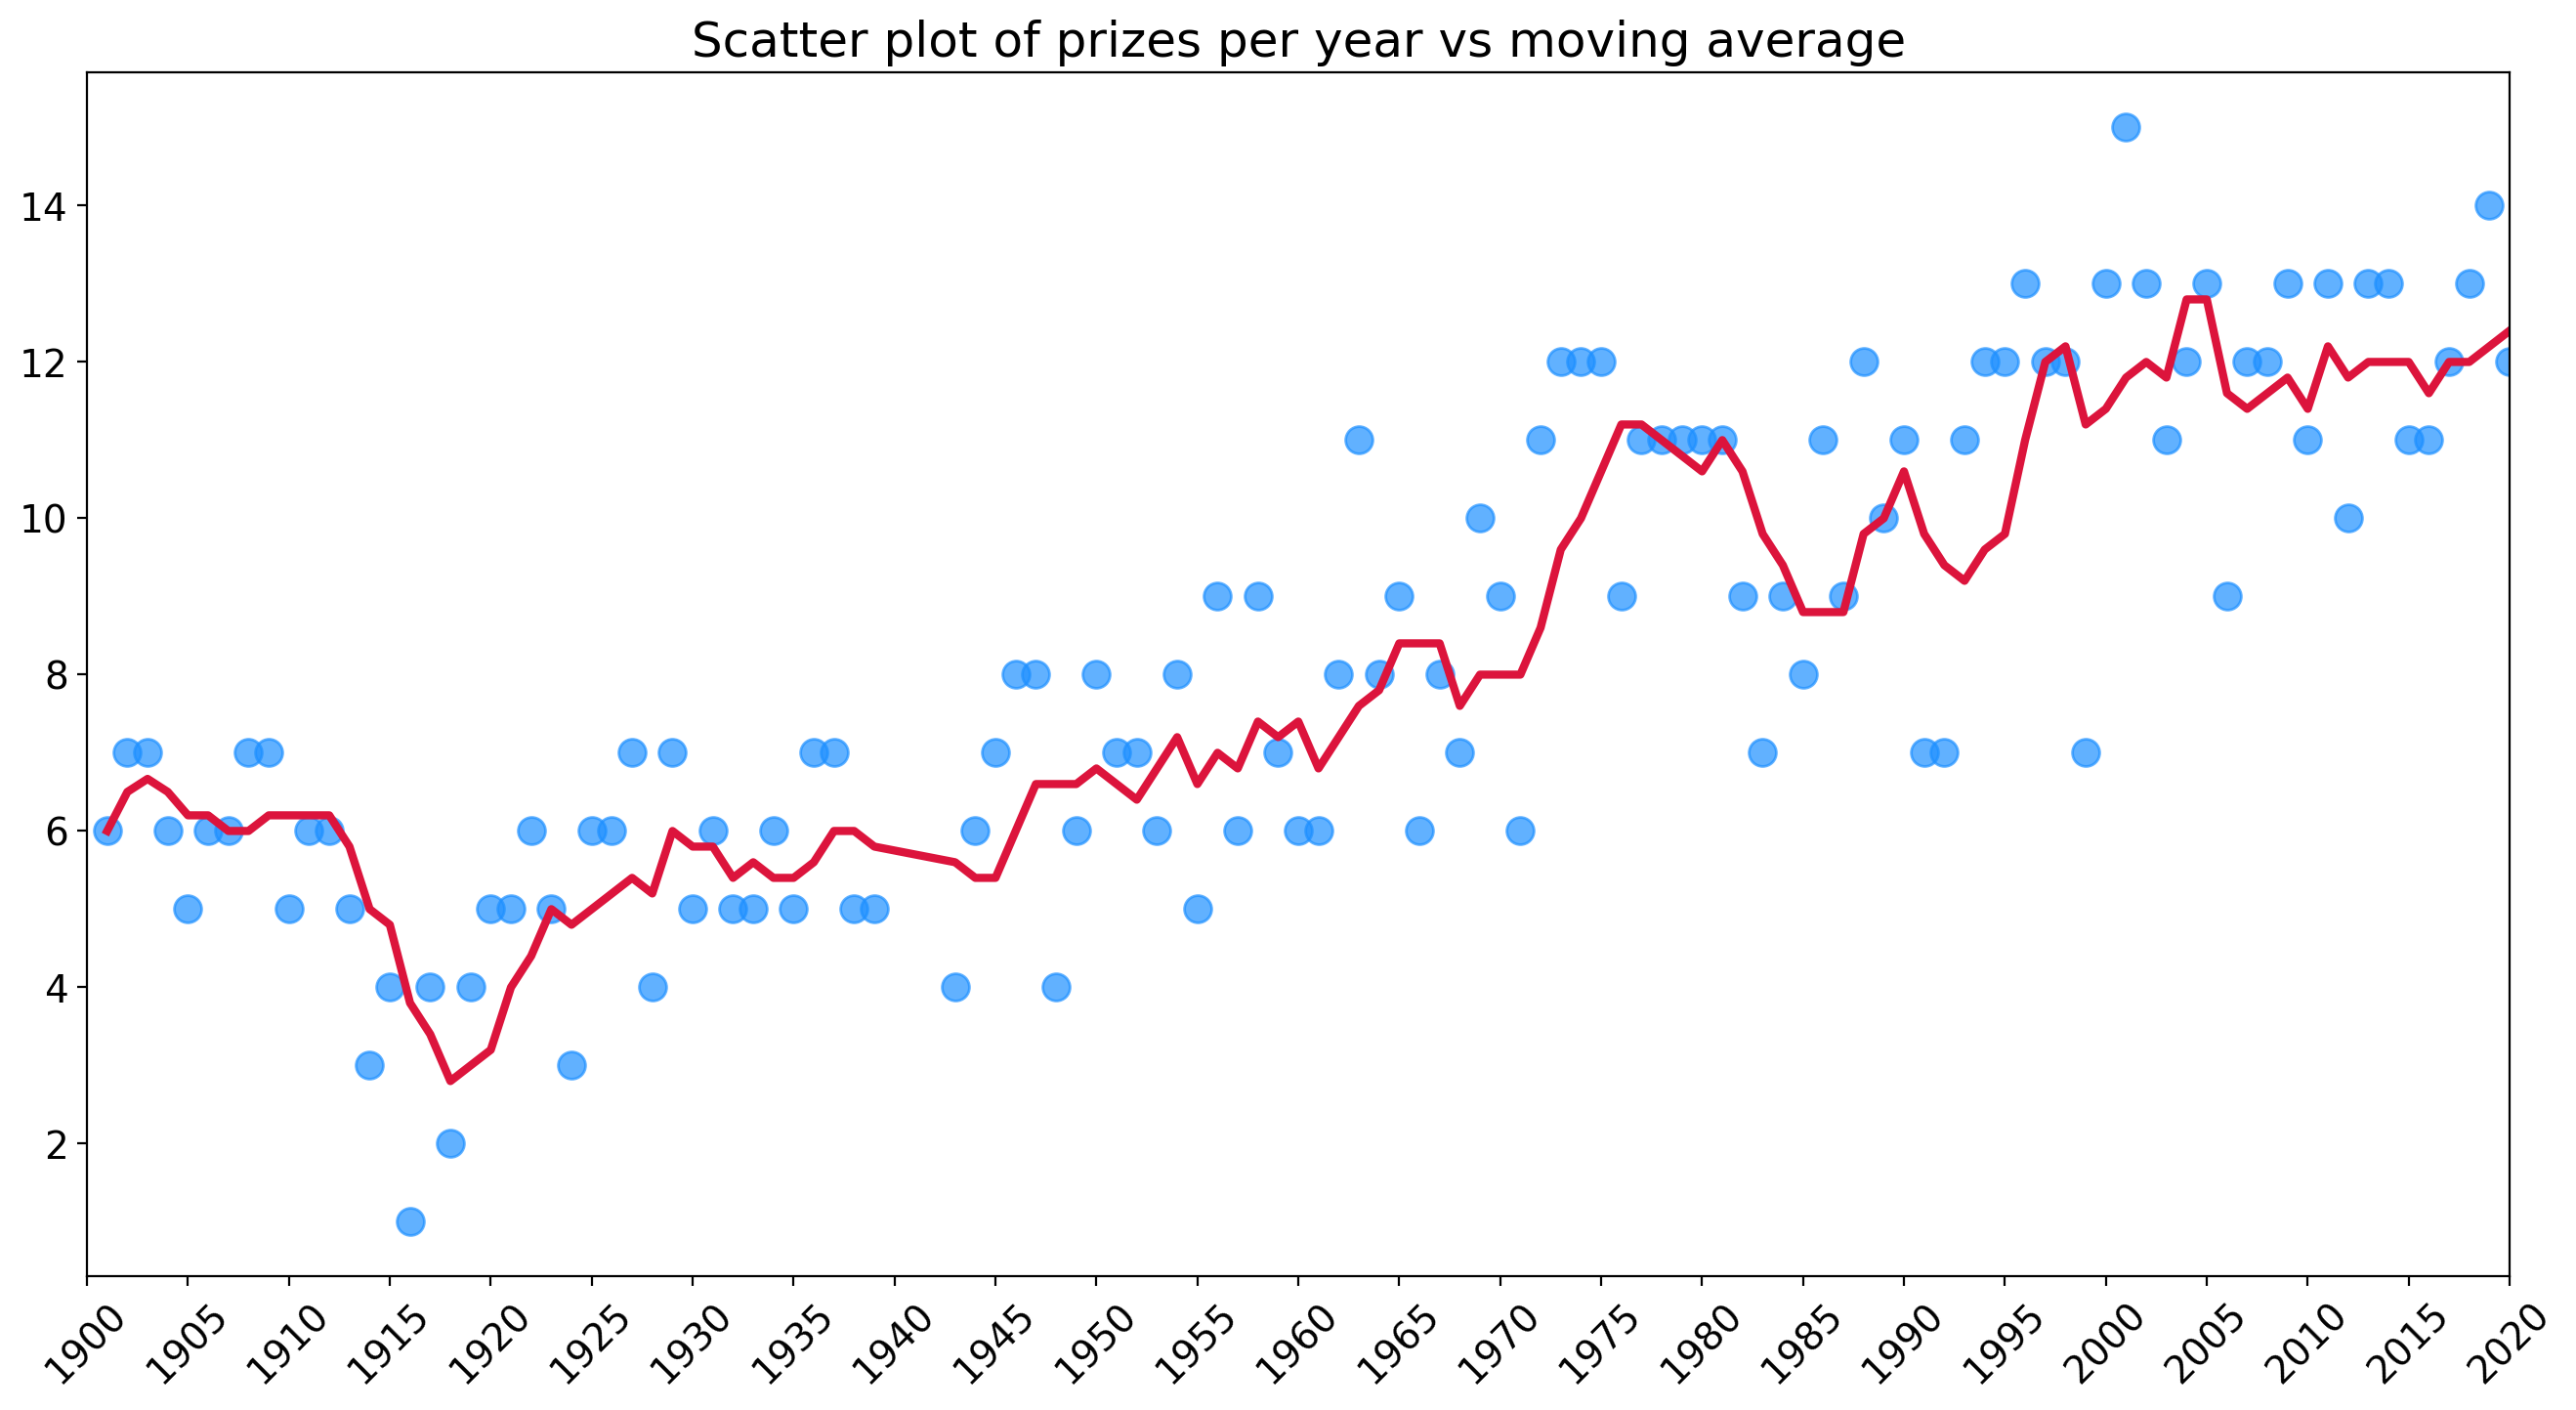

In [29]:
# I'm basically copying the entire solution but it's about knowing what's happening, not remembering each line
# Unhealthy coping mechanism
plt.figure(figsize=(16,8), dpi= 200)
plt.title('Scatter plot of prizes per year vs moving average', fontsize= 18)
plt.yticks(fontsize= 14)
plt.xticks(ticks = np.arange(1900, 2021, step=5),
           fontsize= 14, rotation= 45)

ax = plt.gca() # Get current axes
ax.set_xlim(1900, 2020)

ax.scatter(x= prizes_each_year.index, y= prizes_each_year.values,
           c= 'dodgerblue', alpha= 0.7, s= 100)
ax.plot(rolling_5year.index, rolling_5year.values,
        c= 'crimson', linewidth= 3)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

Since the prize share is in string format we need to clean that mess up

In [30]:
df_data.Prize_Share_Perc = pd.to_numeric(df_data.Prize_Share_Perc.str.replace('%',''))

In [31]:
prize_share = df_data.groupby(['year']).Prize_Share_Perc.mean()
prize_share

,Prize_Share_Perc
year,
1901,83.33
1902,71.43
1903,71.43
1904,83.33
1905,100.00
...,...
2016,54.55
2017,50.00
2018,46.15


In [32]:
prize_share_rolling = prize_share.rolling(window=5, min_periods= 1).mean()
prize_share_rolling

,Prize_Share_Perc
year,
1901,83.33
1902,77.38
1903,75.40
1904,77.38
1905,81.90
...,...
2016,52.28
2017,50.28
2018,50.28


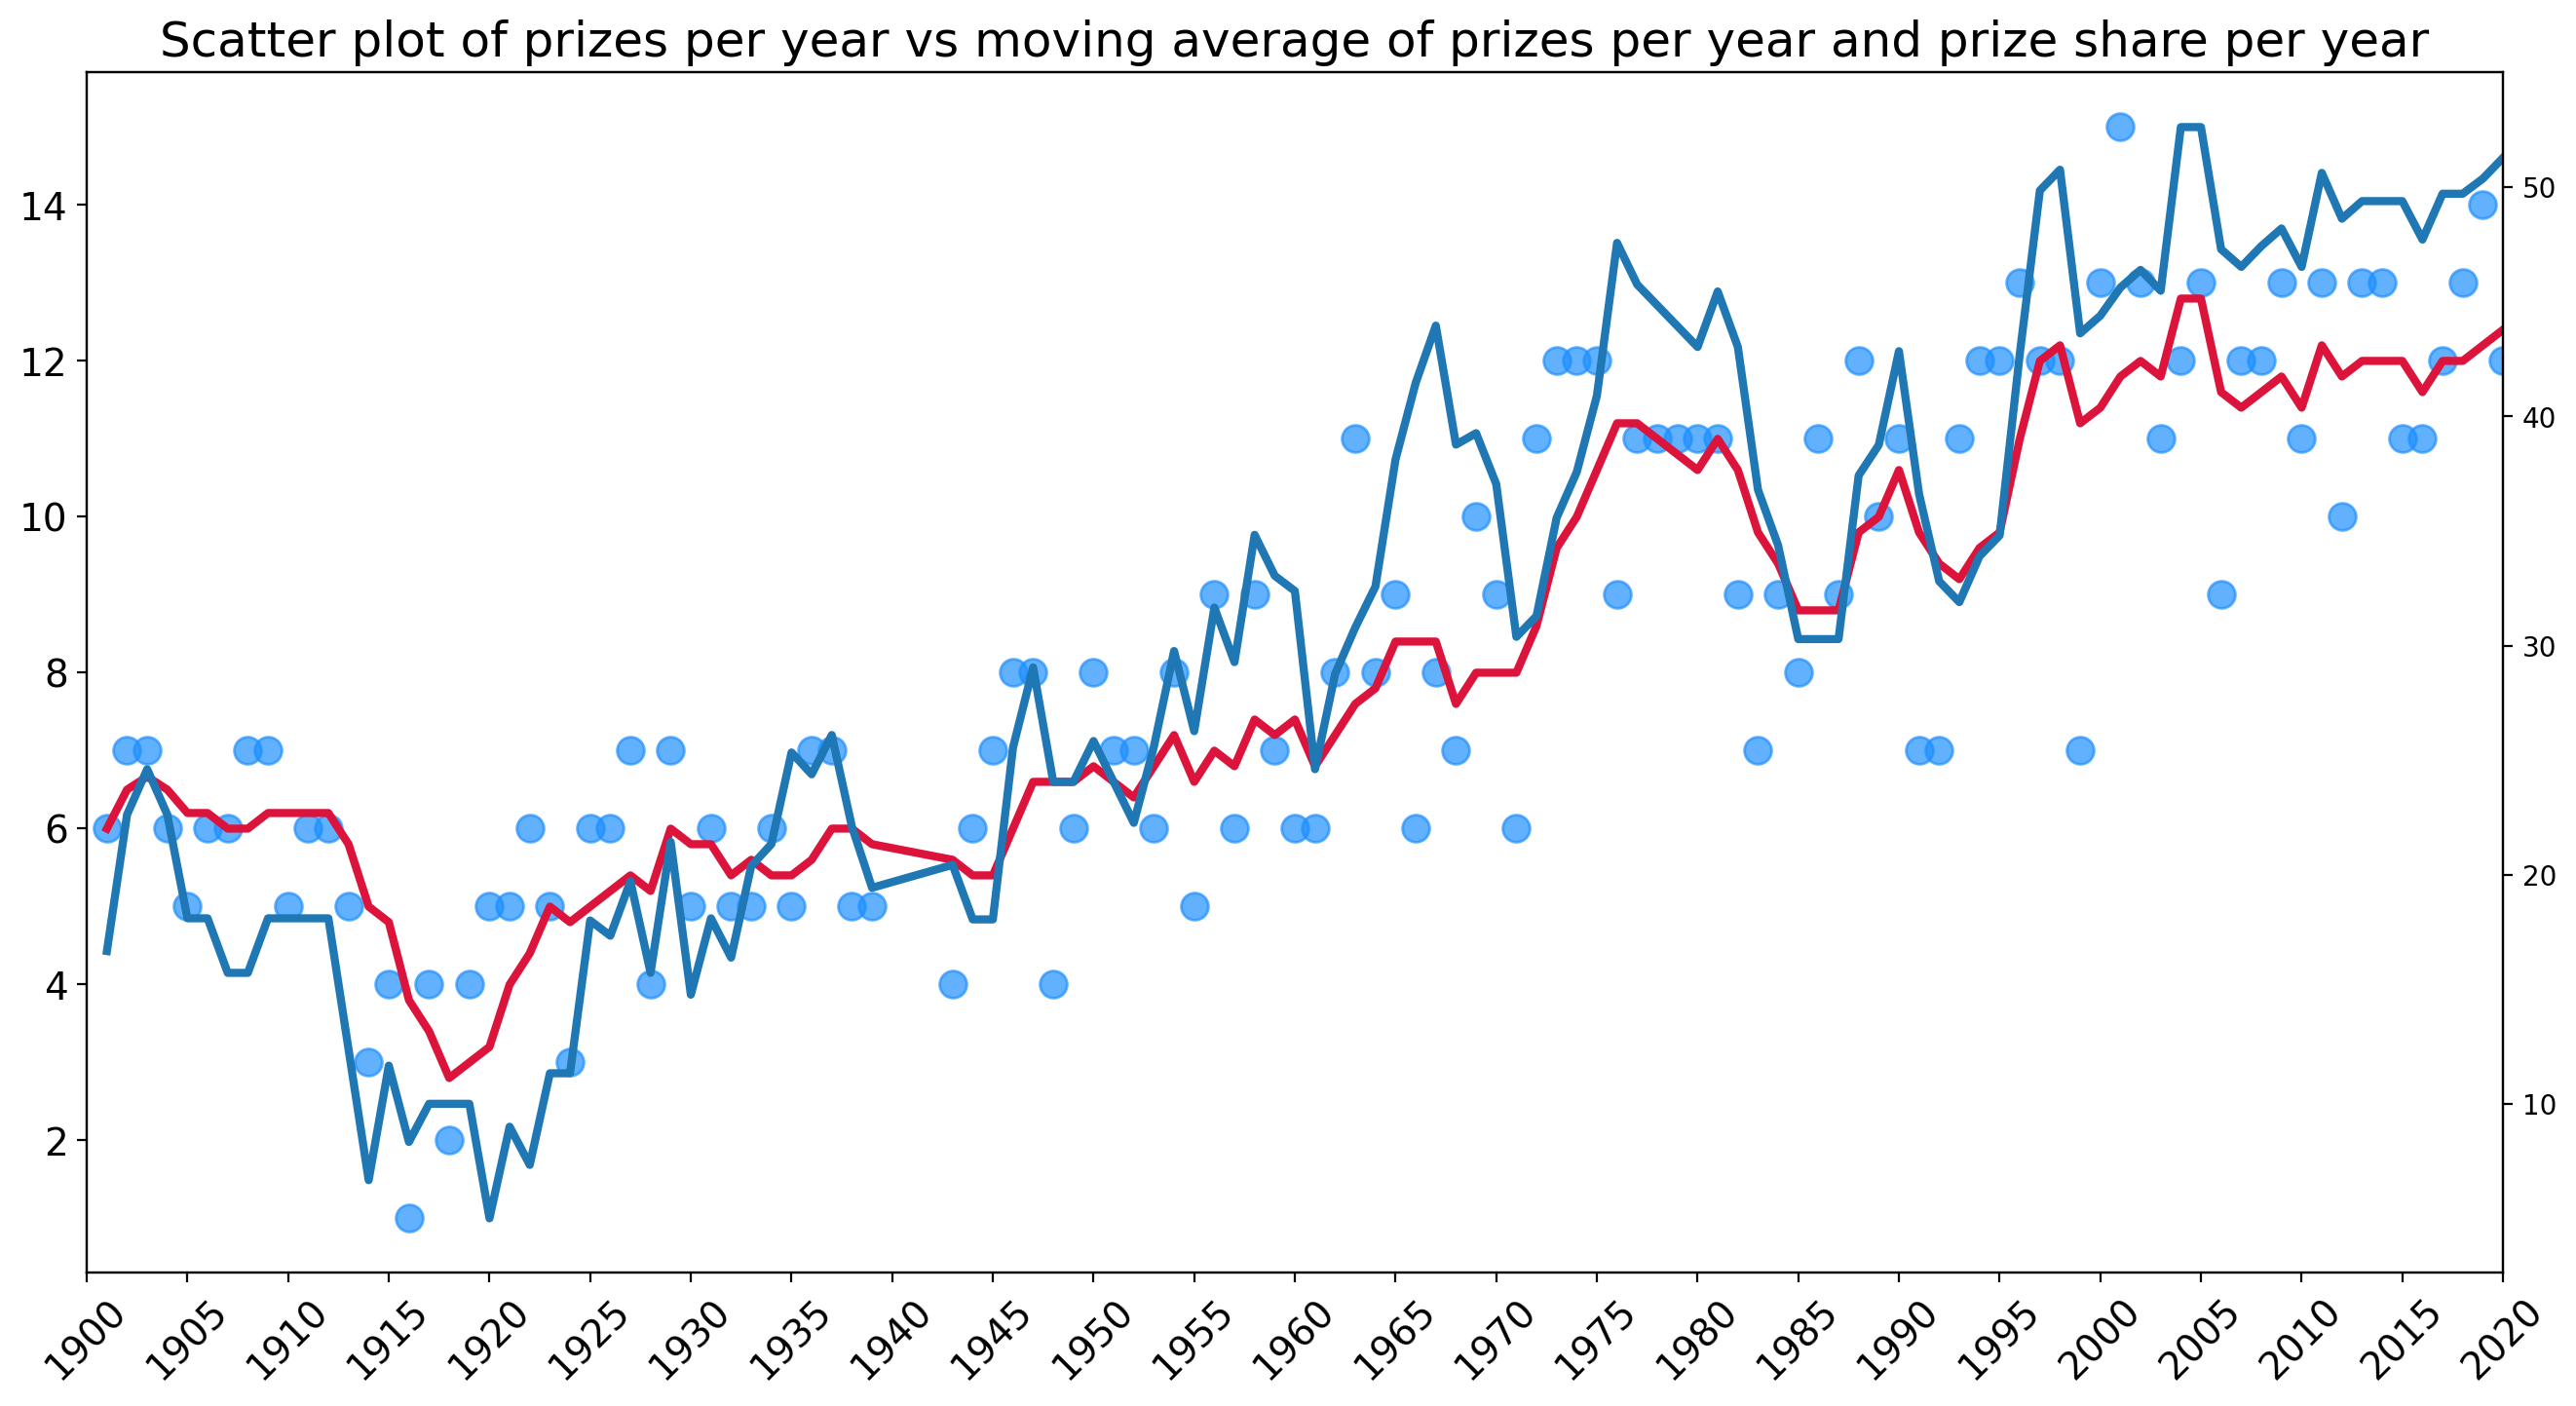

In [33]:
plt.figure(figsize=(16,8), dpi= 200)
plt.title('Scatter plot of prizes per year vs moving average of prizes per year and prize share per year', fontsize= 18)
plt.yticks(fontsize= 14)
plt.xticks(ticks = np.arange(1900, 2021, step=5),
           fontsize= 14, rotation= 45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(x= prizes_each_year.index, y= prizes_each_year.values,
           c= 'dodgerblue', alpha= 0.7, s= 100)
ax.plot(rolling_5year.index, rolling_5year.values,
        c= 'crimson', linewidth= 3)

ax2 = ax.twinx()
ax2.plot(prize_share_rolling.index, 100-prize_share_rolling.values,
         linewidth= 3) # This was my attempt at inverting the Y axis

plt.show()

Here we can see a clear relationship between the number of prizes per year, and the declining shares of the prize per person

In [ ]:
# Course used this instead:
ax2.invert_yaxis()


How didn't I find this method as I was looking at the possible ones for ax2? Guess we'll never know

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [34]:
print(df_data.birth_country.unique())
print(df_data.birth_country_current.unique())
print(df_data.organization_country.unique())

['Netherlands' 'France' 'Prussia (Poland)' 'Switzerland'
 'Prussia (Germany)' 'Schleswig (Germany)' 'India' 'Sweden' 'Norway'
 'Faroe Islands (Denmark)' 'United Kingdom' 'Russian Empire (Poland)'
 'Scotland' 'Spain' 'Russia' nan 'Poland' 'Germany'
 'Austrian Empire (Czech Republic)' 'Hungary (Slovakia)' 'Tuscany (Italy)'
 'Italy' 'United States of America' 'Bavaria (Germany)'
 'British India (India)' 'Austrian Empire (Italy)' 'New Zealand'
 'East Friesland (Germany)' 'Russian Empire (Ukraine)' 'Denmark'
 'Luxembourg' 'Russian Empire (Latvia)' 'Belgium' 'Hesse-Kassel (Germany)'
 'Germany (Russia)' 'Mecklenburg (Germany)' 'Austria' 'Prussia (Russia)'
 'Australia' 'Austria-Hungary (Slovenia)' 'Ireland' 'Canada'
 'Java, Dutch East Indies (Indonesia)' 'Austrian Empire (Austria)'
 'Germany (Poland)' 'W&uuml;rttemberg (Germany)' 'Argentina'
 'Austria-Hungary (Hungary)' 'Austria-Hungary (Austria)'
 'Austria-Hungary (Croatia)' 'Russian Empire (Finland)'
 'Austria-Hungary (Poland)' 'Chile' 'Aust

Looking at all the unique country names, we can rule out birth country as it consists of old names which, after the world wars and other events, have changed, so it contains duplicates as well.

But the organization country is limites, as there are limited organizations and they are mostly centered.

Our best bet is to use the birth_county_current column

In [35]:
top_20_countries = df_data.groupby('birth_country_current',as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False)[:20]
top_20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
57,Poland,27
40,Japan,27
61,Russia,26
11,Canada,20
39,Italy,19


In [36]:
country_bar = px.bar(top_20_countries.sort_values(by='prize'), y= 'birth_country_current', x='prize',
                     color='prize', title= 'Top 20 Countries and Their Number of Prizes',
                     )
country_bar.update_layout(coloraxis_showscale= False,
                          xaxis_title = 'Number of prizes', yaxis_title= 'Country')
country_bar.show()

I sorted it again because I didn't know of a way to put the highest values at the top anad do it in descending order.

The course solution was cheeky with this, it takes the initial sort in ascending order then takes the last 20 values using [-20:] so tha data is now in ascending order and no need to sort again.

Another difference is the use of orientation='h' but idk what it does honestly

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [37]:
# Looked at the course solution, apparently we're making a brand new dataframe with the ISO, I was trying to incorporate it into the old one
iso_locations = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
# Now I realize why we created a new df. We want all the countries this time, not only the top 20. Makes sense. Now we can use this data in the plot

In [ ]:
# for country in top_20_countries.birth_country_current:
#   print(df.loc[df.country == country].iso_alpha.values)

I was doing all sorts of shenanigans until I looked at the solution code only to realize we already had the ISO code in the initial dataframe. And here I was trying to map the values into ISO data by cross referencing, and still failing.

In [38]:
df = px.data.gapminder(year=2007)

fig = px.choropleth(df, locations= iso_locations.ISO,
                    color= iso_locations.prize,
                    hover_name= iso_locations.birth_country_current,
                    color_continuous_scale= px.colors.sequential.matter)
fig.show()

The course solution uses our new dataframe as the input to the chloropleth function, but I had followed the docs, and since the output is as intended, I'll keep it as an artifact.

Also the solution included an update_layout method with coloraxis_showscale=True, but it is already being shown

One thing I'm missing out by not using my own df as the input is that the color name, label and such are named after the variables instead of the column name. If I had taken my own df, I could have had their labels resemble their columns. But it is fine as is.

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [39]:
country_cat_prize = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
country_cat_prize.sort_values(by='prize', ascending=False, inplace=True)
country_cat_prize

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
190,Turkey,Chemistry,1
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


I had to look at the solution to realize that since we only want the top 20 countries, which we already have country wise data for before, we can simply merge these two dataframes and use it.

I also had no idea we could rename columns by simply giving new string values to the columns attribute.

In [40]:
merged_df = pd.merge(country_cat_prize, top_20_countries, on= 'birth_country_current')
merged_df.columns = ['Country', 'Category', 'Catwise_Prize', 'Country_Prize']
merged_df

,Country,Category,Catwise_Prize,Country_Prize
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United Kingdom,Medicine,28,105
...,...,...,...,...
105,Japan,Peace,1,27
106,Hungary,Literature,1,9
107,Hungary,Economics,1,9
108,Poland,Economics,1,27


Finally we can now use this to plot it onto the bar chart

In [41]:
country_bar = px.bar(merged_df.sort_values(by='Country_Prize'), x= 'Country_Prize', y='Country',
                     orientation='h',
                     color='Catwise_Prize', title= 'Top 20 Countries and Their Number of Prizes',
                     color_continuous_scale=px.colors.sequential.Bluered
                     )
country_bar.update_layout(coloraxis_showscale= True,
                          xaxis_title = 'Number of prizes', yaxis_title= 'Country')
country_bar.show()

On my playing with the data, changing the value of x from Catwise_Prize to Country_Prize doesn't change anything

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [42]:
prize_by_year = df_data.groupby(['year','birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
prize_by_year

,year,birth_country_current,prize
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1
...,...,...,...
622,2019,United States of America,3
623,2020,France,1
624,2020,Germany,1
625,2020,United Kingdom,2


I had initially put it in the order of year then country but since we want details for each country and each year is for that country, not the other way, I decided to do as the course says, and changed the order.

In the very next step, the data was sorted by year (??).my order already does that, so I reverted back

Now I need to do a cumulative sum, in the course cumsum() is used, which I wasn't introduced to, but let's roll with it anyway.

In [56]:
# Course solution:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


I played around with the code and this is what I unearthed:

The first groupby separates the two columns into the index, sum does nothing, then we take the first index i.e. country, group by it and then use cumulative sum on it

In [43]:
# With some help from GPT, my solution would be a bit messy if I were to go with it my way
cumulative_prizes = prize_by_year
cumulative_prizes['cumulative_prizes'] = prize_by_year.groupby(['birth_country_current'])['prize'].cumsum()
cumulative_prizes.sort_values(by=['birth_country_current', 'year'], inplace= True)
cumulative_prizes = cumulative_prizes[['birth_country_current', 'year', 'cumulative_prizes']]
cumulative_prizes

,birth_country_current,year,cumulative_prizes
234,Algeria,1957,1
469,Algeria,1997,2
149,Argentina,1936,1
186,Argentina,1947,2
366,Argentina,1980,3
...,...,...,...
626,United States of America,2020,281
371,Venezuela,1980,1
324,Vietnam,1973,1
563,Yemen,2011,1


In [44]:
line_chart = px.line(cumulative_prizes, x= 'year', y= 'cumulative_prizes', color= 'birth_country_current',
                     hover_name= 'birth_country_current')
line_chart.update_layout(xaxis_title= 'Year', yaxis_title= 'Cumulative Number of Prizes')
line_chart.show()

From this we can see that the US came into the lead after the events of the second world war, and has never been threatened in terms of numbers ever since.

In fact, UK, which is the second highest winner, still only equals the prizes of the US in 1977.

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [45]:
top_orgs = df_data.groupby('organization_name').agg({'prize': pd.Series.count})
top_orgs = top_orgs.sort_values(by='prize')[-20:]
top_orgs

,prize
organization_name,
Sorbonne University,7
London University,7
Harvard Medical School,7
University College London,7
Bell Laboratories,8
Cornell University,8
Yale University,9
MRC Laboratory of Molecular Biology,10
University of Oxford,12


Course solution did a value_counts on the organization name, then took first 20 of the results since it already gives it in descending order. Then the series was sorted again to ascending order.

yet again I had arranged it in descending order, and when I saw the chart I realized, so I changed to an ascending format, and sliced the ones in the front instead of the ones in the back

In [46]:
top_orgs_plot = px.bar(top_orgs, x= 'prize', y= top_orgs.index,orientation='h',
                       title= "Number of prizes by affiliated organization",
                       color= 'prize', color_continuous_scale=px.colors.sequential.Sunsetdark)
top_orgs_plot.update_layout(xaxis_title= 'Number of Prizes', yaxis_title= 'Organization Name',
                            coloraxis_showscale=False) # now this attribute has become second nature
top_orgs_plot.show()

We can see that 29 are affiliated with Harvard, and 20 with Chicago

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [47]:
top_cities = df_data.groupby('organization_city').agg({'prize': pd.Series.count})
top_cities = top_cities.sort_values(by='prize')[-20:]
top_cities

,prize
organization_city,
"Ithaca, NY",8
Göttingen,8
Heidelberg,9
"Boston, MA",9
"New Haven, CT",9
Munich,9
Moscow,10
Stockholm,10
Berlin,12


In [48]:
top_cities_plot = px.bar(top_cities, x= 'prize', y= top_cities.index,orientation='h',
                       title= "Number of prizes by organization cities",
                       color= 'prize', color_continuous_scale=px.colors.sequential.Agsunset)
top_cities_plot.update_layout(xaxis_title= 'Number of Prizes', yaxis_title= 'City',
                              coloraxis_showscale= False)
top_cities_plot.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [49]:
top_birth_cities = df_data.groupby('birth_city').agg({'prize': pd.Series.count})
top_birth_cities = top_birth_cities.sort_values(by='prize')[-20:]
top_birth_cities

,prize
birth_city,
Edinburgh,3
Montreal,4
Cairo,4
"Pittsburgh, PA",4
Prague,5
Frankfurt-on-the-Main,5
Hamburg,6
Stockholm,6
Munich,7


In [50]:
top_birth_cities_plot = px.bar(top_birth_cities, x= 'prize', y= top_birth_cities.index,orientation='h',
                       title= "Number of prizes by birth cities",
                       color= 'prize', color_continuous_scale=px.colors.sequential.Plasma)
top_birth_cities_plot.update_layout(xaxis_title= 'Number of Prizes', yaxis_title= 'City',
                              coloraxis_showscale= False)
top_birth_cities_plot.show()

We can clearly see a domination by New York. For the percentage per city, I will need to do something here. Let me plot a pie chart for this

In [51]:
cities_in_us = df_data.query('birth_country_current == "United States of America"').groupby('birth_city', as_index=False).agg({'prize': pd.Series.count})
cities_in_us.sort_values(by='prize', ascending=False, inplace=True)
cities_in_us[:10]

,birth_city,prize
88,"New York, NY",53
28,"Chicago, IL",12
17,"Brooklyn, NY",8
149,"Washington, DC",8
14,"Boston, MA",8
103,"Pittsburgh, PA",4
37,"Detroit, MI",3
20,"Cambridge, MA",3
4,"Ann Arbor, MI",3
87,"New Haven, CT",3


In [52]:
us_cities_pie = px.pie(cities_in_us, labels= 'birth_city', values= 'prize', names= 'birth_city',
                       title= 'Cities in US and their share of prizes within the country')
us_cities_pie.update_traces(textfont_size= 14, textposition= 'inside', textinfo= 'percent+label')
us_cities_pie.show()

If only I knew I was about to create a sunburst chart as well

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [57]:
prize_by_org = df_data.groupby(['organization_name', 'organization_city', 'organization_country'], as_index=False).agg({'prize': pd.Series.count})
prize_by_org.sort_values(by='prize', inplace=True)

In [59]:
sunburst_plot = px.sunburst(prize_by_org, path=['organization_country', 'organization_city', 'organization_name'],
                            values= 'prize', title='Where do people discover things?')
sunburst_plot.update_layout(xaxis_title='Number of prizes', yaxis_title='City',
                            coloraxis_showscale=False)
sunburst_plot.show()

My initial sunburst looked different. Upon looking at the course solution, I realized I had forgotten to put the value so it took the last thing in the path i.e. probably number of organizations to create the chart. Now it is good, and we can click on options to see their values and also look within.

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [65]:
winning_age = df_data.year - df_data.birth_date.dt.year
df_data.insert(12, column='winning_age', value= winning_age)

I only take the year of the brith date, no regard to month and year.

The difference with course solution is that I purposefully picked a position for the new column, while the course inserts it at the end directly

### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [68]:
df_data.winning_age.describe()

,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


This tells us a lot, youngest at age 17, oldest at 97, average of ~60, 75% are younger than 69.

But we need info about the people who won at oldest, youngest; and we also need to plot so we need to create a new dataframe

In [73]:
columns_of_interest.append('winning_age')
df_data.loc[df_data.winning_age.idxmin()][columns_of_interest]

,885
year,2014
category,Peace
motivation,"""for their struggle against the suppression of..."
full_name,Malala Yousafzai
birth_country,Pakistan
organization_name,NaN
winning_age,17.00


Okay youngest appears to be Malala Yousafzai, consistent with my knowledge

In [74]:
df_data.loc[df_data.winning_age.idxmax()][columns_of_interest]

,937
year,2019
category,Chemistry
motivation,“for the development of lithium-ion batteries”
full_name,John Goodenough
birth_country,Germany
organization_name,University of Texas
winning_age,97.00


Looks like he was Goodenough to receive a prize at the age of 97

In [99]:
#Course solution
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,Prize_Share_Perc,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,winning_age,sex,organization_name,organization_city,organization_country,ISO
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,33.33,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,97.00,Male,University of Texas,Austin TX,United States of America,DEU


,year,category,prize,motivation,prize_share,Prize_Share_Perc,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,winning_age,sex,organization_name,organization_city,organization_country,ISO
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,50.00,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,17.00,Female,NaN,NaN,NaN,PAK


I didn't even know there was a display function. Was I even expected to find this answer by myself?

<Axes: xlabel='winning_age', ylabel='Count'>

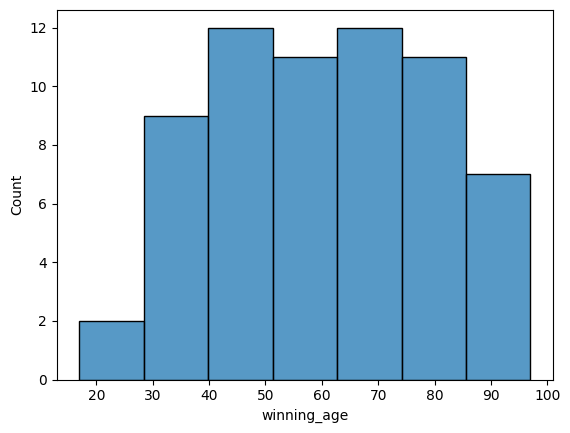

In [77]:
prize_by_age = df_data.groupby('winning_age').agg({'prize': pd.Series.count})
sns.histplot(prize_by_age, x='winning_age')

Okay this is fine, but what if we had a bin width set, the number of datapoints to create a bar would be controllable

<Axes: xlabel='winning_age', ylabel='prize'>

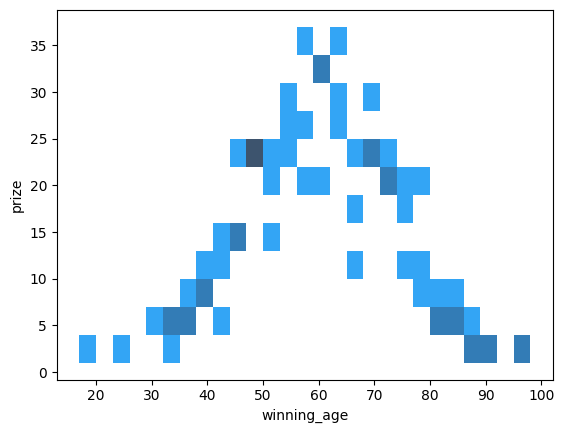

In [79]:
sns.histplot(prize_by_age, x='winning_age', y='prize', binwidth=3)

<Axes: xlabel='winning_age', ylabel='prize'>

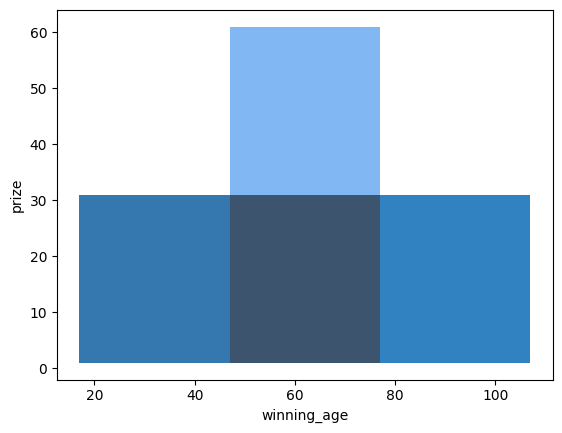

In [80]:
sns.histplot(prize_by_age, x='winning_age', y='prize', binwidth=30)

These are wonky. It seems I was instead asked to manipulate the bin attribute, not bin width

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

Text(0.5, 1.0, 'Number of prizes by age at time of award')

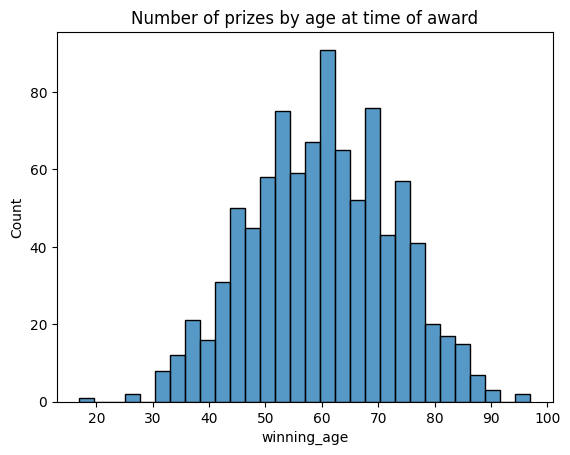

In [103]:
sns.histplot(df_data, x='winning_age', bins=30)
plt.title('Number of prizes by age at time of award')

Looks like I even used the histoplot wrong, I was supposed to give a dataframe and it would count itself, I didn't need to create a new counted column. Anyway we can verify here that the age of ~60 was the highest recipient of Nobel prize.

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


<Axes: xlabel='year', ylabel='winning_age'>

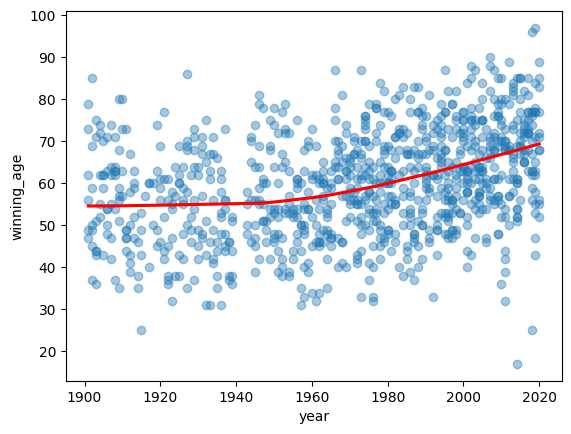

In [104]:
winning_age_evolution = df_data[['year', 'winning_age']]
sns.regplot(winning_age_evolution, x= 'year', y='winning_age', lowess= True,
            scatter_kws={'alpha': 0.4},
            line_kws= {'color': 'red'})

I had forgotten how to change the alpha value and line color and had to rely on the course solution for that.

The trend line shows that the age at reception of Nobel prize has been gradually increasing since the 1960s.

In 1900-1940, the average Nobel laureate was somewhere around 55 years old, in 2020, the age had reached an average of 70.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

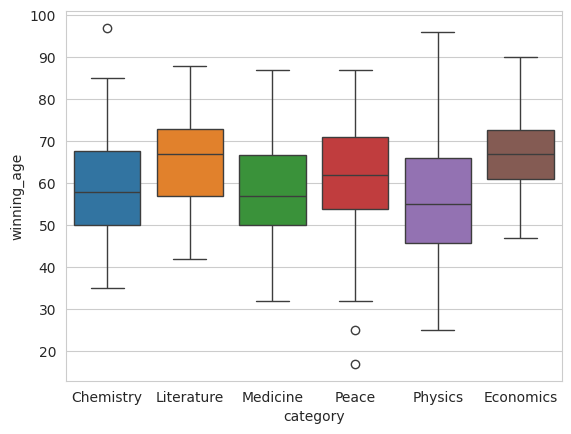

In [108]:
age_by_category = df_data[['category', 'winning_age']]
with sns.axes_style('whitegrid'):
  sns.boxplot(age_by_category, x='category', y='winning_age', hue= 'category')

Again referred to the course solution for the whitegrid part. Also added hue later from docs for some flair.

The average winners are youngest in Physics, and oldest in Literature

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


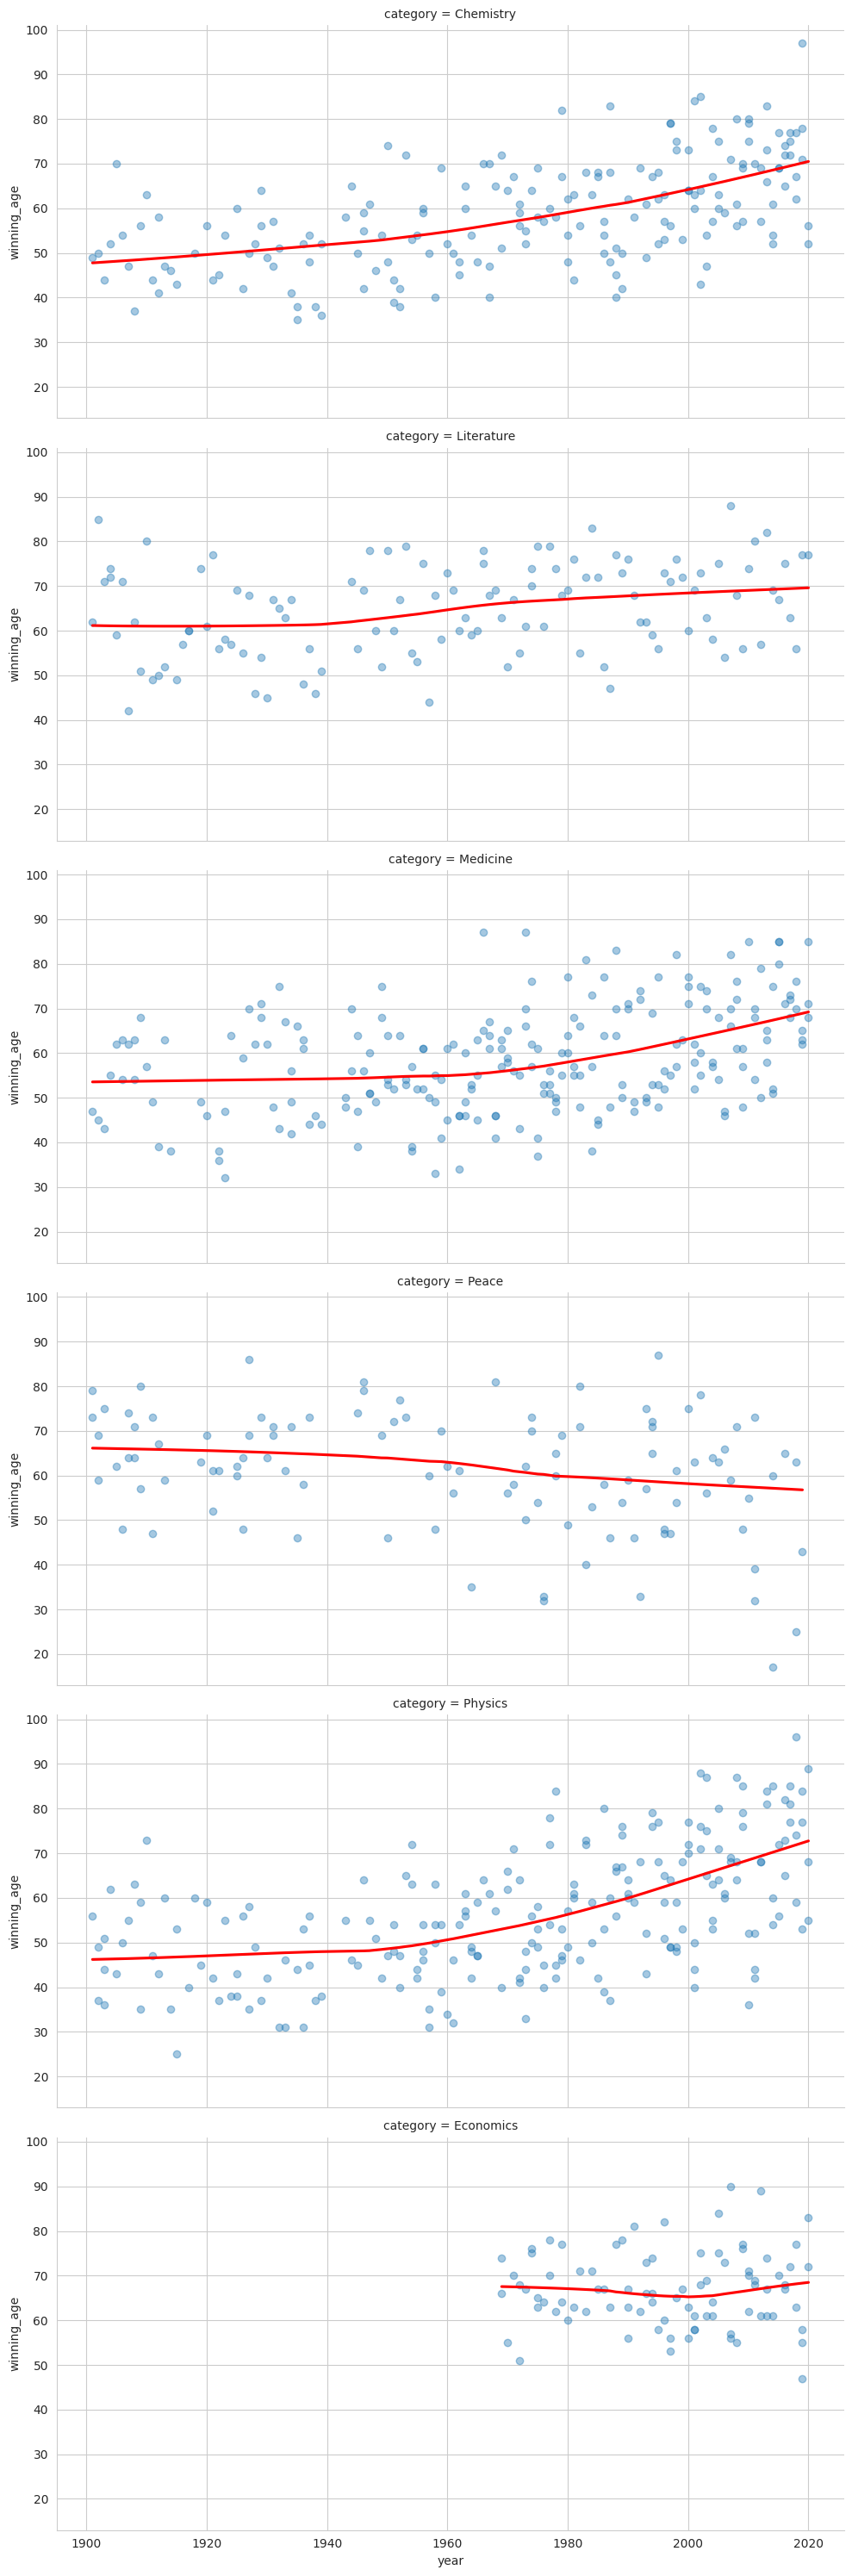

In [110]:
with sns.axes_style('whitegrid'):
  sns.lmplot(df_data, x= 'year', y='winning_age', row= 'category', lowess= True,
             aspect=2, scatter_kws= {'alpha': 0.4}, line_kws= {'color': 'red'})

References from course soln: whitegrid, kws attributes, aspect attribute

Chemistry went from sub-50 to 70, Literature from 60 to 70, medicine shot up after the 60s, from around 53 to 70.

The laureates for peace prize are trending below currently though, with exceptions like Malala, from upper 60s to upper 50s.

The data for physics went up around 1950-60 and hasn't looked back since, from 48ish to 70+. The data for economics is low and prize only began in 1969, so it has not seen much of the changing field and has stayed relatively stable, lowering down a bit in 2000s then getting back up to previous normal

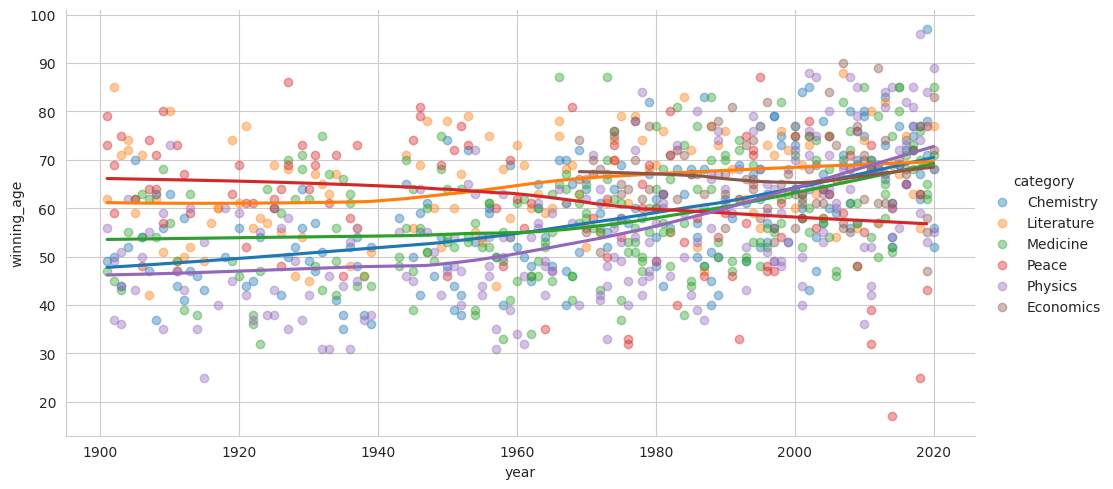

In [111]:
with sns.axes_style('whitegrid'):
  sns.lmplot(df_data, x= 'year', y='winning_age', hue= 'category', lowess= True,
           aspect= 2, scatter_kws= {'alpha': 0.4})